In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from seagul.plot import smooth_bounded_curve
import ce_apg
from IPython.display import HTML, clear_output
import jax


from brax.io import html, model
from brax.envs import create_fn

jax.config.update('jax_platform_name', 'cpu')


def visualize(sys, qps, height=480):
  """Renders a 3D visualization of the environment."""
  return HTML(html.render(sys, qps, height=height))

save_dir = "./save_ce_apg2"


In [ ]:
save_dir = "./save_ce_apg_pend2"
env_save_name = "inverted_pendulum_swingup"
env_display_name = "Inverted Pendulum"
reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()

reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{reward_arr[-1,:].mean()} +- {reward_arr[-1,:].std()}")


# =====

env_name = env_save_name
seed = np.argmax(reward_arr[-1,:])

env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
env = env_fn()
policy = pickle.load(open(f"{save_dir}/{env_name}_policy", 'rb'))
rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{seed}", 'rb'))

plt.figure()
plt.plot(rewards)
plt.grid()
plt.title(f"{env_name} {seed}")

inference_fn = ce_apg.make_inference_fn(
    env.observation_size, env.action_size, True, policy)
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")

jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

reward_sums = []
for seed in range(10):
    rollout = []
    rng = jax.random.PRNGKey(seed=seed)
    state = jit_env_reset(rng=rng)
    h0 = np.zeros_like(state.obs)
    h = h0

    while not state.done:
      rollout.append(state)
      h, act = jit_inference_fn(params, h, state.obs)
      state = jit_env_step(state, act)

    rewards = [s.reward for s in rollout]
    reward_sums.append(sum(rewards))
    
    
print(f"{np.mean(reward_sums)} +- {np.std(reward_sums)}")

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

HTML(html.render(env.sys, [s.qp for s in rollout]))



3410.7578125 +- 400.51861572265625


TypeError: sub got incompatible shapes for broadcasting: (8,), (25,).

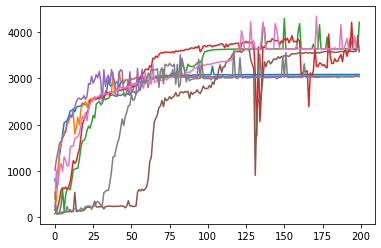

<Figure size 432x288 with 0 Axes>

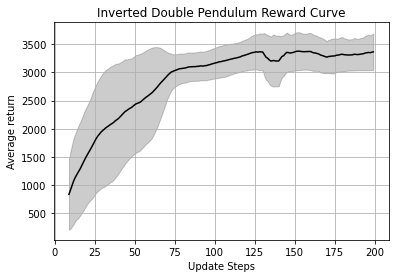

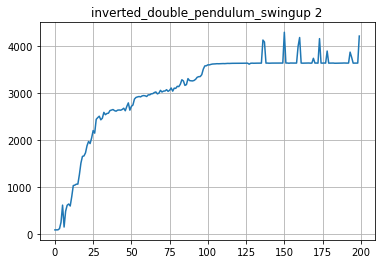

In [4]:
save_dir = "./save_ce_apg2"
env_save_name = "inverted_double_pendulum_swingup"
env_display_name = "Inverted Double Pendulum"
reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()


reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{np.nanmean(reward_arr[-1,:])} +- {np.nanstd(reward_arr[-1,:])}")

# == 

env_name = env_save_name
seed = np.argmax(reward_arr[-1,:])

env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
env = env_fn()
policy = pickle.load(open(f"{save_dir}/{env_name}_policy", 'rb'))
rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{seed}", 'rb'))

plt.figure()
plt.plot(rewards)
plt.grid()
plt.title(f"{env_name} {seed}")

inference_fn = ce_apg.make_inference_fn(
    env.observation_size, env.action_size, True, policy)
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")

jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

reward_sums = []
for seed in range(10):
    rollout = []
    rng = jax.random.PRNGKey(seed=seed)
    state = jit_env_reset(rng=rng)
    h0 = np.zeros_like(state.obs)
    h = h0

    while not state.done:
      rollout.append(state)
      h, act = jit_inference_fn(params, h, state.obs)
      state = jit_env_step(state, act)

    rewards = [s.reward for s in rollout]
    reward_sums.append(sum(rewards))
    
    
print(f"{np.nanmean(reward_sums)} +- {np.nanstd(reward_sums)}")


rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)
h0 = np.zeros_like(state.obs)
h = h0

while not state.done:
  rollout.append(state)
  h, act = jit_inference_fn(params, h, state.obs)
  state = jit_env_step(state, act)

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

HTML(html.render(env.sys, [s.qp for s in rollout]))



-1961.3968505859375 +- 526.396240234375
best seed: 1
3298.67724609375 +- 125.2137451171875


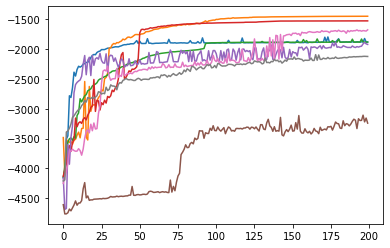

<Figure size 432x288 with 0 Axes>

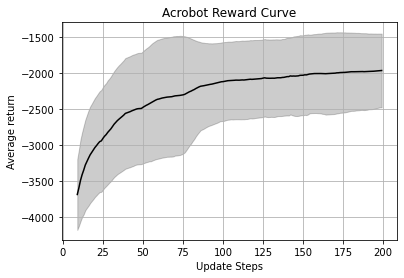

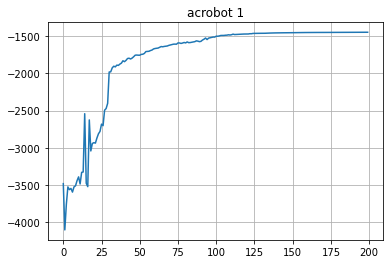

In [27]:
save_dir = "./save_ce_apg2"
env_save_name = "acrobot"
env_display_name = "Acrobot"
reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()

reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{reward_arr[-1,:].mean()} +- {reward_arr[-1,:].std()}")

## ====
env_name = env_save_name
seed = np.argmax(reward_arr[-1,:])
print(f"best seed: {seed}")

env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
env = env_fn()
policy = pickle.load(open(f"{save_dir}/{env_name}_policy", 'rb'))
rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{seed}", 'rb'))

plt.figure()
plt.plot(rewards)
plt.grid()
plt.title(f"{env_name} {seed}")

inference_fn = ce_apg.make_inference_fn(
    env.observation_size, env.action_size, True, policy)
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")

jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

reward_sums = []
for seed in range(10):
    rollout = []
    rng = jax.random.PRNGKey(seed=seed)
    state = jit_env_reset(rng=rng)
    h0 = np.zeros_like(state.obs)
    h = h0

    while not state.done:
      rollout.append(state)
      h, act = jit_inference_fn(params, h, state.obs)
      state = jit_env_step(state, act)

    rewards = [s.reward for s in rollout]
    reward_sums.append(sum(rewards))
    
    
print(f"{np.mean(reward_sums)} +- {np.std(reward_sums)}")

In [32]:
seed = 1
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")
rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)
h0 = np.zeros_like(state.obs)
h = h0

while not state.done:
  rollout.append(state)
  h, act = jit_inference_fn(params, h, state.obs)
  state = jit_env_step(state, act)

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

print(sum(rewards))
obs = [s.obs for s in rollout]
plt.figure() 

HTML(html.render(env.sys, [s.qp for s in rollout]))

3340.312


<Figure size 432x288 with 0 Axes>

In [10]:
reward_sums

[DeviceArray(-218.82762, dtype=float32),
 DeviceArray(-215.54659, dtype=float32),
 DeviceArray(-217.70567, dtype=float32),
 DeviceArray(-219.56238, dtype=float32),
 DeviceArray(-217.7537, dtype=float32),
 DeviceArray(-213.70894, dtype=float32),
 DeviceArray(-217.15492, dtype=float32),
 DeviceArray(-218.92189, dtype=float32),
 DeviceArray(-214.18185, dtype=float32),
 DeviceArray(-218.2044, dtype=float32),
 DeviceArray(-218.82762, dtype=float32)]

In [ ]:
pos = np.array(obs)[:,:2]
t = [i*0.01 for i in range(pos.shape[0])]
plt.rcParams['text.usetex'] = True
plt.rcParams["font.serif"] = "Helvetica"
plt.rcParams["font.size"] = 14

plt.plot(t, pos[:,0], 'k');
plt.plot(t, pos[:,1], 'b--');
plt.ylabel('Angle (rad)')
plt.xlabel('Time (s)')
plt.legend([r'$\phi_{1}$', r'$\phi_{2}$'])


plt.grid()
plt.title('Acrobot Rollout CE-APG')

In [ ]:
plt.rcParams['text.usetex'] = True

plt.plot([s.obs for s in rollout])
plt.grid()
plt.legend([r'$\phi_{1}$', r'$\phi_{2}$',  r'$d\phi_{1}$', r'$d\phi_{2}$' ])
plt.title('Acrobot Rollout')